In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model
plt.rcParams['figure.figsize'] = (10, 6)


Analyze the data you collected.

Plot parts of your data to make sense of it(what impact to K, N, D, and the data structure have?)
Perform regression based on the performance we expect to see. Do tests confirm or disprove our expectations? What running times do you expect to see based on  simple big-O analysis?

Are there any aspects of your data that seem unusual? Can you explain them?

This is pretty open ended. The goal is to use simple visualization and regression to make sense of the timing data that you collected.

In [3]:
df = pd.read_csv("../../spatialDatastructuresStarterCode/Results.csv")

In [4]:
import seaborn as sns; sns.set_theme();

In [5]:
# https://stackoverflow.com/questions/43061768/plotting-multiple-scatter-plots-pandas
# these results are unfiltered

# K types
quad_df_K = df.loc[(df['Type'] == "QuadTree_K")]
KD_df_K = df.loc[(df["Type"] == "KDTree_K")]
bucket_df_K = df.loc[(df["Type"] == 'Bucket_K')]
dumb_df_K = df.loc[(df["Type"] == 'Dumb_K')]

# N Types
quad_df_N = df.loc[(df['Type'] == "QuadTree_N")]
KD_df_N = df.loc[(df["Type"] == "KDTree_N")]
bucket_df_N = df.loc[(df["Type"] == 'Bucket_N')]
dumb_df_N = df.loc[(df["Type"] == 'Dumb_N')]


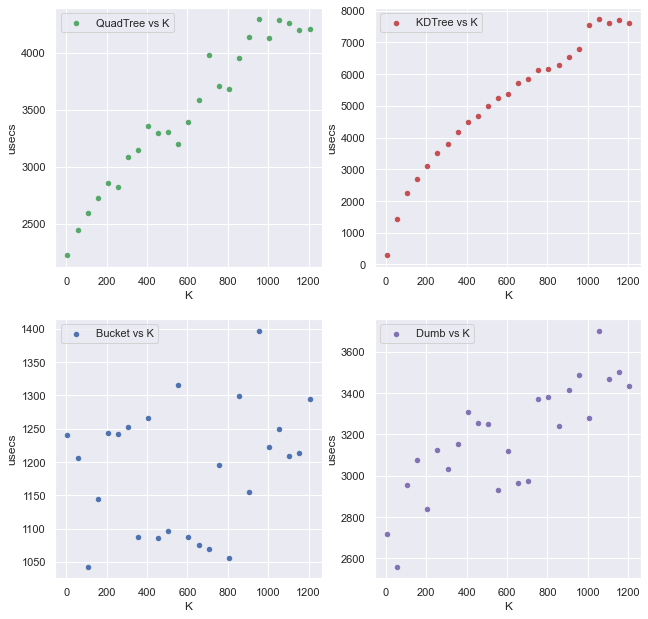

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(10.5, 10.5)

# linear regression stuff

# K stuff all seperate
ax1_quad_K = quad_df_K.plot(kind='scatter', x='K', y='usecs', color='g', label="QuadTree vs K", ax=ax1)
ax1_KD_K = KD_df_K.plot(kind='scatter', x='K', y='usecs', color='r', label="KDTree vs K", ax=ax2)
ax1_bucket_K = bucket_df_K.plot(kind='scatter', x='K', y='usecs', color='b',  label="Bucket vs K", ax=ax3)
ax1_dumb_K = dumb_df_K.plot(kind='scatter', x='K', y='usecs', color='m' , label="Dumb vs K", ax=ax4)

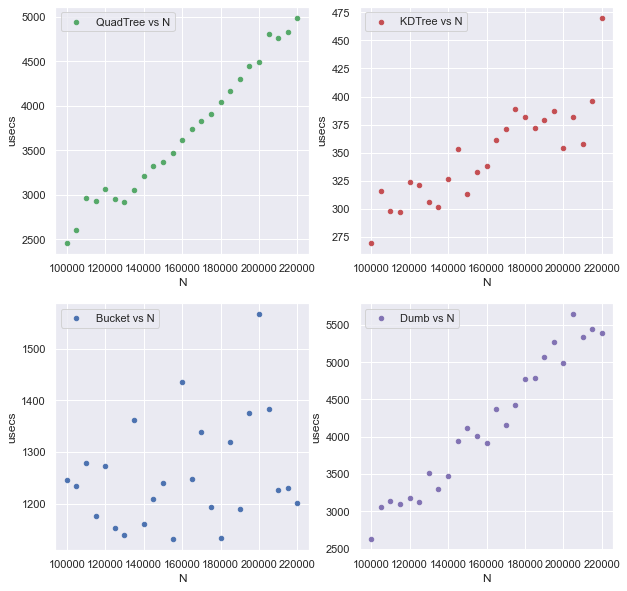

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(10, 10)

# looking at N
ax1_quad_N = quad_df_N.plot(kind='scatter', x='N', y='usecs', color='g', label="QuadTree vs N", ax=ax1)
ax1_KD_N = KD_df_N.plot(kind='scatter', x='N', y='usecs', color='r', label="KDTree vs N", ax=ax2)
ax1_bucket_N = bucket_df_N.plot(kind='scatter', x='N', y='usecs', color='b',  label="Bucket vs N", ax=ax3)
ax1_dumb_N = dumb_df_N.plot(kind='scatter', x='N', y='usecs', color='m' , label="Dumb vs N", ax=ax4)


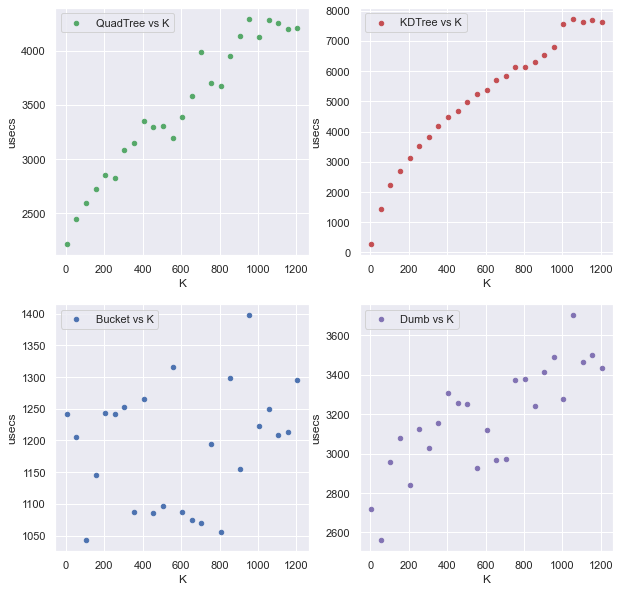

In [8]:
# how does K affect quad // all on same
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(10, 10)

ax1_quad_K = quad_df_K.plot(kind='scatter', x='K', y='usecs', color='g', label="QuadTree vs K", ax=ax1)
# how does K affect bucket
ax1_KD_K = KD_df_K.plot(kind='scatter', x='K', y='usecs', color='r', label="KDTree vs K", ax=ax2)
# how does K affect KD
ax1_bucket_K = bucket_df_K.plot(kind='scatter', x='K', y='usecs', color='b',  label="Bucket vs K", ax=ax3)
ax1_dumb_K = dumb_df_K.plot(kind='scatter', x='K', y='usecs', color='m' , label="Dumb vs K", ax=ax4)

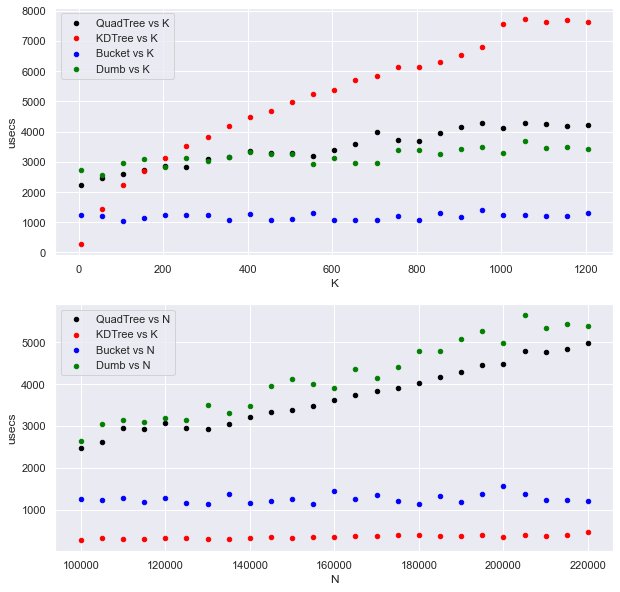

In [9]:
# K stuff together

fig, subfigs = plt.subplots(2, 1, figsize=(10, 10))

# K stuff
ax1_quad_K = quad_df_K.plot(kind='scatter', x='K', y='usecs', color='black', label="QuadTree vs K", ax=subfigs[0])
ax1_KD_K = KD_df_K.plot(kind='scatter', x='K', y='usecs', color='red', label="KDTree vs K", ax=subfigs[0])
ax1_bucket_K = bucket_df_K.plot(kind='scatter', x='K', y='usecs', color='blue',  label="Bucket vs K", ax=subfigs[0])
ax1_dumb_K = dumb_df_K.plot(kind='scatter', x='K', y='usecs', color='green' , label="Dumb vs K", ax=subfigs[0])

# this is for N
ax1_quad_N = quad_df_N.plot(kind='scatter', x='N', y='usecs', color='black', label="QuadTree vs N", ax=subfigs[1])
ax1_KD_N = KD_df_N.plot(kind='scatter', x='N', y='usecs', color='red', label="KDTree vs K", ax=subfigs[1])
ax1_bucket_N = bucket_df_N.plot(kind='scatter', x='N', y='usecs', color='blue',  label="Bucket vs N", ax=subfigs[1])
ax1_dumb_N = dumb_df_N.plot(kind='scatter', x='N', y='usecs', color='green' , label="Dumb vs N", ax=subfigs[1])

## Linear Regression based off of K and N seperately

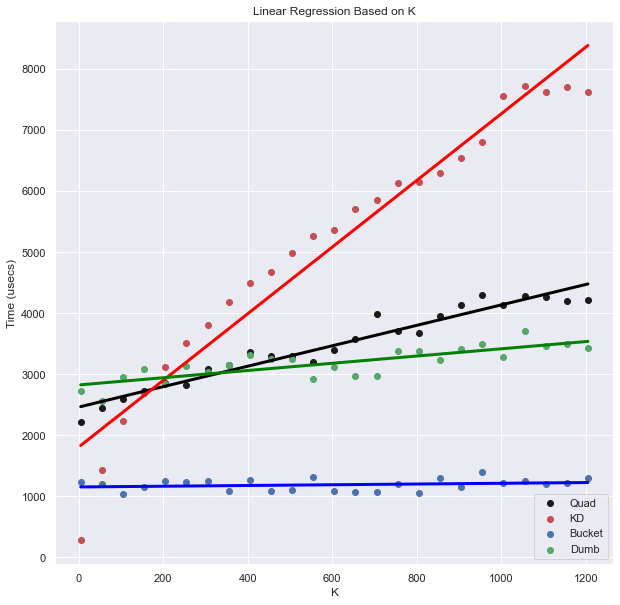

In [10]:
plt.figure( figsize=[10,10])
plt.title("Linear Regression Based on K")
quad_K_ols = sm.ols(formula="usecs ~ K", data=quad_df_K ).fit()
plt.scatter(x=quad_df_K["K"], y=quad_df_K["usecs"], c='k',label='Quad')
plt.plot(quad_df_K["K"], quad_K_ols.predict(),  color='black', linewidth=3)

# for KD
KD_ols_K = sm.ols(formula="usecs ~ K", data=KD_df_K).fit()
plt.scatter(x=KD_df_K["K"], y=KD_df_K["usecs"], c='r',label='KD')
plt.plot(KD_df_K["K"], KD_ols_K.predict(), color='red', linewidth=3)

# bucket
bucket_ols_K = sm.ols(formula="usecs ~ K", data=bucket_df_K).fit()
plt.scatter(x=bucket_df_K["K"], y=bucket_df_K["usecs"], c='b',label='Bucket')
plt.plot(bucket_df_K["K"], bucket_ols_K.predict(),  color='blue', linewidth=3)

# dumb
dumb_ols_K = sm.ols(formula="usecs ~ K", data=dumb_df_K).fit()
plt.scatter(x=dumb_df_K["K"], y=dumb_df_K["usecs"], c='g',label='Dumb')
plt.plot(dumb_df_K["K"], dumb_ols_K.predict(), color='green', linewidth=3)

plt.xlabel('K')
plt.ylabel('Time (usecs)')

plt.legend(numpoints=1,loc=4)
plt.show()

plt.show()

As K grew KD tree did the worst. 

Quad tree starts off worse than Dumb but is surpassed as K increases. 

Bucket does the best keeping almost constant time as K increases. 

For KD and Quad tree the decision on weather or not to recurse to children nodes is largly dependent on k. 

This is not the case for the bucket and dumb data structures. Each of which basically return the first K points sorted based on distance from the qeary point. 

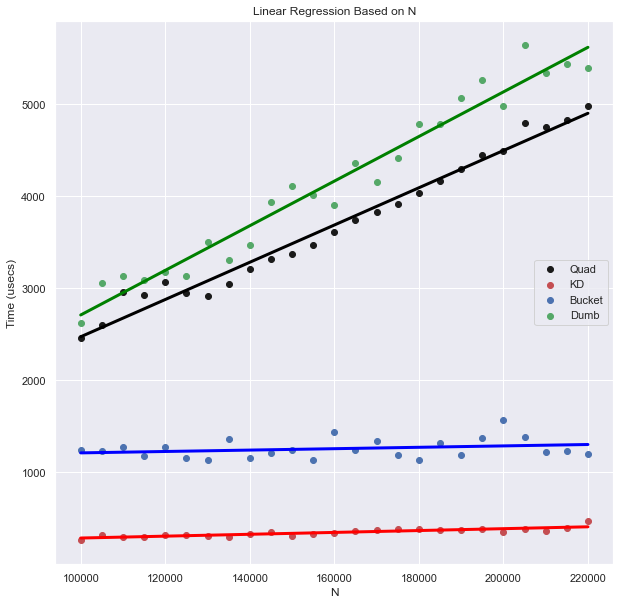

In [11]:
# here is some regression
# # N Types
plt.figure( figsize=[10,10])
plt.title("Linear Regression Based on N")
quad_N_ols = sm.ols(formula="usecs ~ N", data=quad_df_N ).fit()
plt.scatter(x=quad_df_N["N"], y=quad_df_N["usecs"], c='k',label='Quad')
plt.plot(quad_df_N["N"], quad_N_ols.predict(),  color='black', linewidth=3)

# for KD
KD_ols_N = sm.ols(formula="usecs ~ N", data=KD_df_N).fit()
plt.scatter(x=KD_df_N["N"], y=KD_df_N["usecs"], c='r',label='KD')
plt.plot(KD_df_N["N"], KD_ols_N.predict(), color='red', linewidth=3)

# bucket
bucket_ols_N = sm.ols(formula="usecs ~ N", data=bucket_df_N).fit()
plt.scatter(x=bucket_df_N["N"], y=bucket_df_N["usecs"], c='b',label='Bucket')
plt.plot(bucket_df_N["N"], bucket_ols_N.predict(),color='blue', linewidth=3)

# dumb
dumb_ols_N = sm.ols(formula="usecs ~ N", data=dumb_df_N).fit()
plt.scatter(x=dumb_df_N["N"], y=dumb_df_N["usecs"], c='g',label='Dumb')
plt.plot(dumb_df_N["N"], dumb_ols_N.predict(),  color='green', linewidth=3)

plt.xlabel('N')
plt.ylabel('Time (usecs)')

plt.legend(numpoints=1,loc=5)

It makes sense that the Dumb structure does the worst as N grows. Dumb itterates through all points as it searches for KNN. Big O of dum is N.

Bucket's KNN queary relies on range queary which in worst case scenario would look through every point in the list O(N). It then sorts its list which can be a N log time. Big O for bucket is N LogN.

KD qeary is LogN. We only look through relevent points and cut our work in half with each itteration down the tree. 

Quad tree is Log base 4 N. Each subtree is N/4 as we continue down the tree. 
Quad tree queary time is sort of log base 4 N  K/r impact this....

It seems abnormal that the QuadTree would have done almost as bad as the Dumb tree as K increases

## Dimension Stuff

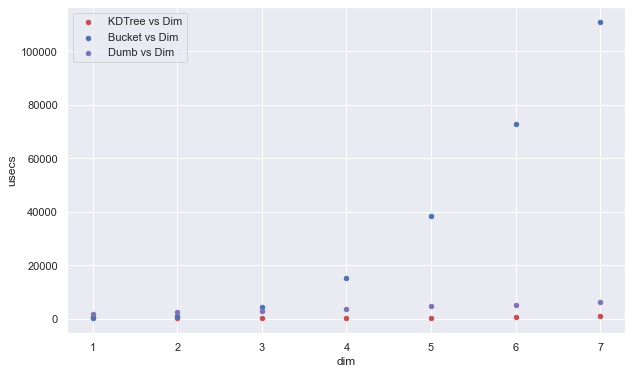

In [12]:
# dim stuff
# dimensions stuff
KD_df_dim = df.loc[(df["Type"] == "KDTree_Dim")]
bucket_df_dim = df.loc[(df["Type"] == 'Bucket_Dim')]
dumb_df_dim = df.loc[(df["Type"] == 'Dumb_Dim')]

ax1_KD_dim = KD_df_dim.plot(kind='scatter', x='dim', y='usecs', color='r', label="KDTree vs Dim")
ax1_bucket_dim = bucket_df_dim.plot(kind='scatter', x='dim', y='usecs', color='b',  label="Bucket vs Dim", ax=ax1_KD_dim)
ax1_dumb_dim = dumb_df_dim.plot(kind='scatter', x='dim', y='usecs', color='m' , label="Dumb vs Dim", ax=ax1_KD_dim)

The only data structe significantly impacted by increasing the number of dimensions is the Bucketing datastructure. 

<ipython-input-24-49b8ccdb1476>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(KD_df_dim["dim"], KD_ols_dim.predict(), 'k', color='red', linewidth=3)
<ipython-input-24-49b8ccdb1476>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(bucket_df_dim["dim"], bucket_ols_dim.predict(), 'k', color='blue', linewidth=3)
<ipython-input-24-49b8ccdb1476>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(dumb_df_dim["dim"], dumb_ols_dim.predict(), 'k', color='green', linewidth=3)


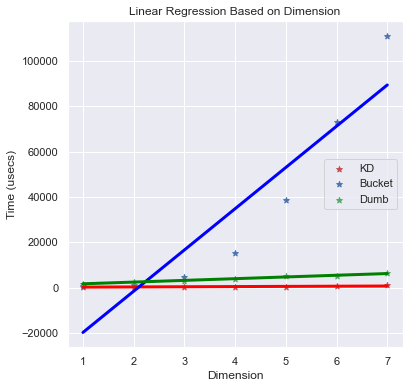

In [24]:
# dimensions stuff
plt.figure(figsize=[6,6])
plt.title("Linear Regression Based on Dimension")

# for KD
KD_ols_dim = sm.ols(formula="usecs ~ dim", data=KD_df_dim).fit()
plt.scatter(x=KD_df_dim["dim"], y=KD_df_dim["usecs"], c='r',marker='*',label='KD')
plt.plot(KD_df_dim["dim"], KD_ols_dim.predict(), 'k', color='red', linewidth=3)

# bucket
bucket_ols_dim = sm.ols(formula="usecs ~ dim", data=bucket_df_dim).fit()
plt.scatter(x=bucket_df_dim["dim"], y=bucket_df_dim["usecs"], c='b',marker='*',label='Bucket')
plt.plot(bucket_df_dim["dim"], bucket_ols_dim.predict(), 'k', color='blue', linewidth=3)

# dumb
dumb_ols_dim = sm.ols(formula="usecs ~ dim", data=dumb_df_dim).fit()
plt.scatter(x=dumb_df_dim["dim"], y=dumb_df_dim["usecs"], c='g',marker='*',label='Dumb')
plt.plot(dumb_df_dim["dim"], dumb_ols_dim.predict(), 'k', color='green', linewidth=3)

plt.xlabel('Dimension')
plt.ylabel('Time (usecs)')

plt.legend(numpoints=1,loc=5)
plt.show()

Changing dimensions only seem to make a difference with BucketKnn. 

KDTree and Dumb implimentation seemed to stay steady as the Dimension increased. 

It makes sense that the KD treee would do well with changing dimensions. The bounding box only changes for a specific dimension as the tree is created. 

As for bucket and Dumb, I am suprised that Dumb did so well compared to KD. 

## Based off of K and N changing

In [15]:
# both N and K
both_quad = df.loc[df['Type'] == "QuadTree_K_N"]
both_KD = df.loc[df['Type'] == "KDTree_K_N"]
both_bucket = df.loc[df['Type'] == "Bucket_K_N"]
both_dumb = df.loc[df['Type'] == "Dumb_K_N"]

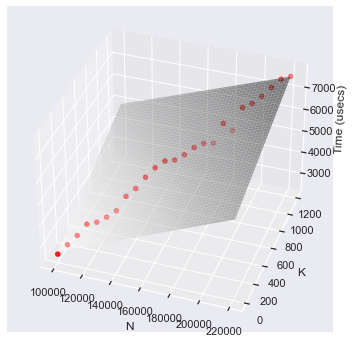

In [16]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# this is for quad
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

both_ols_quad = sm.ols(formula="usecs ~ K + N + K * N", data=both_quad).fit() 

ax.scatter(xs=both_quad['N'], ys=both_quad['K'], zs=both_quad['usecs'], color = "red")

x = np.linspace(both_quad['N'].min(), both_quad['N'].max(), 100)
y = np.linspace(both_quad['K'].min(), both_quad['K'].max(), 100)
X,Y = np.meshgrid(x,y)
par = dict(both_ols_quad.params)
Z = par["Intercept"] + par["N"]*X + par["K"]*Y + par["K:N"]*X*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.5, linewidth=0.05)

ax.view_init(35,-71)

ax.set_xlabel('N')
ax.set_ylabel('K')
ax.set_zlabel('Time (usecs)')

plt.show()

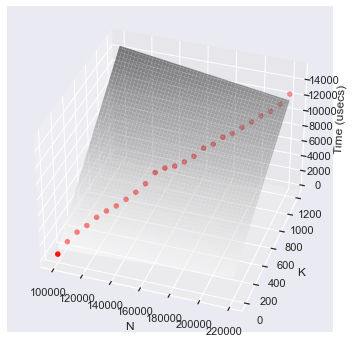

In [17]:
# this is for KD
# K * N is way to try and determine the interaction between K and N??
both_ols_KD = sm.ols(formula="usecs ~ K + N + K * N", data=both_KD).fit()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=both_KD['N'], ys=both_KD['K'], zs=both_KD['usecs'], color = "red")

x = np.linspace(both_KD['N'].min(), both_KD['N'].max(), 100)
y = np.linspace(both_KD['K'].min(), both_KD['K'].max(), 100)
X,Y = np.meshgrid(x,y)
par = dict(both_ols_KD.params)
Z = par["Intercept"] + par["N"]*X + par["K"]*Y + par["K:N"]*X*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.5, linewidth=0.05)

ax.view_init(35,-71)

ax.set_xlabel('N')
ax.set_ylabel('K')
ax.set_zlabel('Time (usecs)')

plt.show()

Looking at how K and N together affect time. It seems obvoius that as both increase, time increses.

## Summary's for K and N together without taking into account their relation.

In [18]:
both_ols_bucket = sm.ols(formula="usecs ~ K + N", data=both_bucket).fit()
both_ols_KD_noRelation = sm.ols(formula="usecs ~ K + N", data=both_KD).fit()
both_ols_quad_noRelation = sm.ols(formula="usecs ~ K + N", data=both_quad).fit() 
both_ols_dumb_noRelation = sm.ols(formula="usecs ~ K + N", data=both_dumb).fit() 

In [19]:
both_ols_quad_noRelation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usecs   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1083.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           7.54e-21
Time:                        10:24:07   Log-Likelihood:                -170.34
No. Observations:                  25   AIC:                             344.7
Df Residuals:                      23   BIC:                             347.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0015      0.000     -7.003      0.000      -0.002      -0.001
K              1.4704      0.210      7.005      0.000       1.036       1.905
N              0.0272      0.001     30.180      0.000       0.025       0.029
==============================================================================
Omnibus:                        2.682   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                1.354
Skew:                          -0.520   Prob(JB):                        0.508
Kurtosis:                       3.468   Cond. No.                     4.61e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
both_ols_KD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usecs   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1051.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.48e-22
Time:                        10:24:07   Log-Likelihood:                -180.96
No. Observations:                  25   AIC:                             367.9
Df Residuals:                      22   BIC:                             371.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0146      0.002     -9.387      0.000      -0.018      -0.011
K             14.5203      1.547      9.387      0.000      11.312      17.728
N              0.0094      0.002      4.642      0.000       0.005       0.014
K:N        -2.896e-05   6.19e-06     -4.678      0.000   -4.18e-05   -1.61e-05
==============================================================================
Omnibus:                        4.563   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                2.778
Skew:                           0.742   Prob(JB):                        0.249
Kurtosis:                       3.681   Cond. No.                     1.10e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.79e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
both_ols_bucket.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usecs   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.3606
Date:                Mon, 28 Jun 2021   Prob (F-statistic):              0.554
Time:                        10:24:07   Log-Likelihood:                -159.90
No. Observations:                  25   AIC:                             323.8
Df Residuals:                      23   BIC:                             326.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0012      0.000      8.519      0.000       0.001       0.001
K             -1.1779      0.138     -8.518      0.000      -1.464      -0.892
N              0.0123      0.001     20.686      0.000       0.011       0.014
==============================================================================
Omnibus:                       16.399   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.350
Skew:                           1.628   Prob(JB):                     0.000171
Kurtosis:                       5.461   Cond. No.                     4.61e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
both_ols_dumb_noRelation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usecs   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     343.6
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           2.52e-15
Time:                        10:24:07   Log-Likelihood:                -176.47
No. Observations:                  25   AIC:                             356.9
Df Residuals:                      23   BIC:                             359.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.15e-05      0.000     -0.117      0.908      -0.001       0.001
K              0.0316      0.268      0.118      0.907      -0.523       0.587
N              0.0299      0.001     25.914      0.000       0.027       0.032
==============================================================================
Omnibus:                        1.156   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                1.050
Skew:                           0.334   Prob(JB):                        0.592
Kurtosis:                       2.250   Cond. No.                     4.61e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""